In [26]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

import act
import metpy.calc as mpcalc
from metpy.units import units

from datetime import datetime
from datetime import timedelta

In [5]:
#Grab ASOS data from nearest station.
time_window = [datetime(2021, 4, 15, 19, 0), datetime(2021, 4, 19, 7, 0)]
my_asoses = act.discovery.get_asos(time_window, station = 'LOT')
station = my_asoses['LOT']

Downloading: LOT


In [16]:
tempsf = station.tmpf.values
dewpsf = station.dwpf.values
time = station.time.values
print(time)
print(temps)

['2021-04-15T00:15:00.000000000' '2021-04-15T00:35:00.000000000'
 '2021-04-15T00:55:00.000000000' '2021-04-15T01:15:00.000000000'
 '2021-04-15T01:35:00.000000000' '2021-04-15T01:55:00.000000000'
 '2021-04-15T02:15:00.000000000' '2021-04-15T02:35:00.000000000'
 '2021-04-15T02:55:00.000000000' '2021-04-15T03:15:00.000000000'
 '2021-04-15T03:35:00.000000000' '2021-04-15T03:55:00.000000000'
 '2021-04-15T04:15:00.000000000' '2021-04-15T04:35:00.000000000'
 '2021-04-15T04:55:00.000000000' '2021-04-15T05:15:00.000000000'
 '2021-04-15T05:35:00.000000000' '2021-04-15T05:55:00.000000000'
 '2021-04-15T06:15:00.000000000' '2021-04-15T06:35:00.000000000'
 '2021-04-15T06:55:00.000000000' '2021-04-15T07:15:00.000000000'
 '2021-04-15T07:35:00.000000000' '2021-04-15T07:55:00.000000000'
 '2021-04-15T08:15:00.000000000' '2021-04-15T08:35:00.000000000'
 '2021-04-15T08:55:00.000000000' '2021-04-15T09:15:00.000000000'
 '2021-04-15T09:35:00.000000000' '2021-04-15T09:55:00.000000000'
 '2021-04-15T10:15:00.000

In [21]:
#Grab files from directory and sort them into correct order
files = []
for filename in glob.glob("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/thermal/"
                          "*.thermal.celsius.csv"):
    files.append(filename)
files.sort()

In [58]:
#Run through all images and save off minimum temperature for each
temp_avg = []
image_count = []
image_time = []

timeset = datetime(2021, 4, 15, 6, 0)

for path in files:
    file = pd.read_csv(path)
    image_time.append(timeset)
    time_change = timedelta(minutes=7)
    timeset = timeset + time_change
    image_array = []
    
    
    for i in range(file.size):
        if i >= 6:
            data = file.values[i][0]
            data = data.split(';')
            array = np.array(data)
            array = array.astype(np.float)
            image_array.append(array)
            
    temp_avg.append(np.average(image_array))

In [59]:
temp_avgc = temp_avg * units.celsius
temp_avgf = temp_avgc.to(units.fahrenheit)

print(temp_avgf)



[46.60607142857133 46.10523554421766 46.157195578231274 46.00526445578226 46.21975850340125 45.21927551020399 45.45902210884351 44.08402465986383 44.495104591836686 42.955956632653034 41.38615646258502 41.80721428571426 40.21901870748289 39.58465476190475 37.954814625850275 37.89871683673463 37.283536564625834 38.56949319727887 38.50330952380943 38.45028571428569 38.93903911564619 36.71616326530604 36.14812244897948 37.57188605442173 35.69582057823119 35.324958333333264 33.591435374149576 30.758258503401333 29.731797619047533 26.98420068027204 28.295936224489736 27.187818027210795 26.622247448979536 27.220715986394467 26.743707482993116 26.221829931972678 25.79168282312916 25.642733843537307 26.32593452380948 25.472297619047552 24.84024489795916 24.671206632653007 26.74866921768701 24.407589285714202 25.841350340135946 25.09856037414958 23.712469387755053 23.95265391156452 24.075277210884263 27.356994897959105 28.67548214285712 29.420089285714212 28.422147108843518 29.461255952380853 2

In [63]:
len(image_time)

969

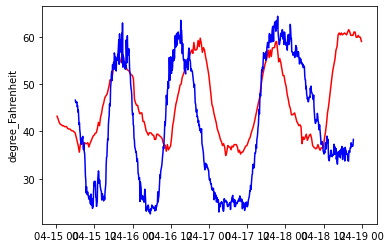

In [65]:
#Plot time series
plt.plot(time, temps, color='red')
plt.plot(image_time[0:750], temp_avgf[0:750], color = 'blue')
#plt.savefig('Thermal_ASOS_Comparison.png')